# Bike Sharing

## Data Exploration

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
day_data = pd.read_csv("C:/Users/Judit/Desktop/hw/Modell/bike+sharing+dataset/day.csv")
hour_data = pd.read_csv("C:/Users/Judit/Desktop/hw/Modell/bike+sharing+dataset/hour.csv")

In [3]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#print(hour_data.shape)
#print(hour_data.describe(include='all'))
#print("\nMissing Values:\n", hour_data.isnull().sum())

In [6]:
#print(day_data.shape)x
#print(day_data.dtypes)
#print(day_data.describe(include='all'))
#print("\nMissing Values:\n", day_data.isnull().sum())

### Mapping

In [7]:
day_data_copy = day_data.copy()
day_data_copy.season = day_data_copy.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
day_data_copy.yr = day_data_copy.yr.map({0:'2011', 1:'2012'})
day_data_copy.mnth = day_data_copy.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
day_data_copy.weekday = day_data_copy.weekday.map({0:'Sunday', 1:'Monday', 2:'Tueday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
day_data_copy.weathersit = day_data_copy.weathersit.map({1:'Clear', 2:'Misty', 3:'Light Weather', 4:'Heavy Weather'})
day_data_copy.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,0,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tueday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Visualization

### Seasonal Usage 

c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword 

Text(0.5, 1.0, 'Usage by Registered Clients')

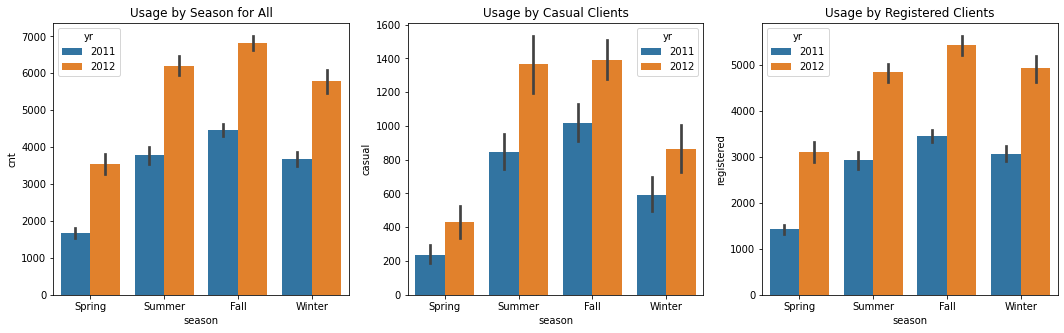

In [8]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot('season', 'cnt', hue='yr', data=day_data_copy)
plt.title('Usage by Season for All')

plt.subplot(1, 3, 2)
sns.barplot('season', 'casual', hue ='yr', data=day_data_copy)
plt.title('Usage by Casual Clients')

plt.subplot(1, 3, 3)
sns.barplot('season', 'registered', hue='yr', data=day_data_copy)
plt.title('Usage by Registered Clients')

Comment: 
Significantly more registered clients are using the public bikes then not registered Clients. Trends on both year is similiar
Suprisingly Spring is a weak season on both side. And Winter has more registered users then summer. 

### Monthly Usage

c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Usage by Registered Clients')

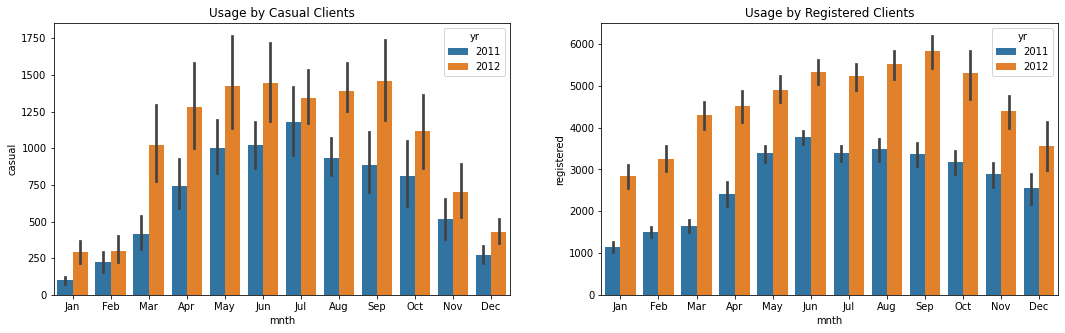

In [9]:
# Monthly Breakdown
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.barplot('mnth', 'casual', hue='yr', data=day_data_copy)
plt.title('Usage by Casual Clients')

plt.subplot(1, 2, 2)
sns.barplot('mnth', 'registered', hue='yr', data=day_data_copy)
plt.title('Usage by Registered Clients')

### Weekday Usage

c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Usage by Registered Clients')

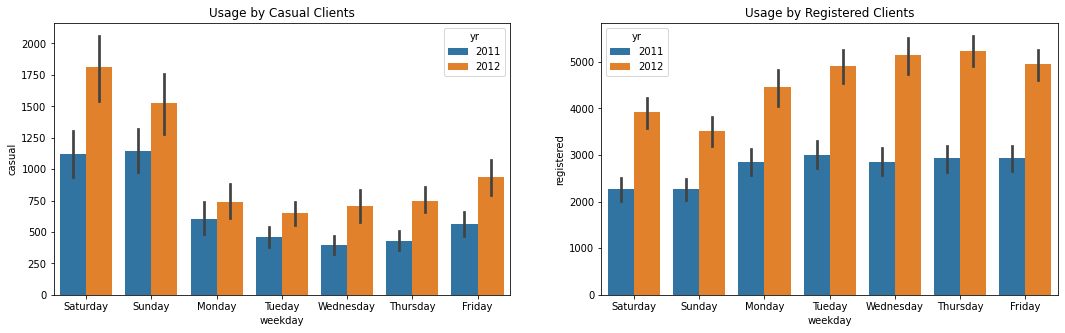

In [10]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.barplot('weekday', 'casual', hue ='yr', data=day_data_copy)
plt.title('Usage by Casual Clients')

plt.subplot(1, 2, 2)
sns.barplot('weekday', 'registered', hue='yr', data=day_data_copy)
plt.title('Usage by Registered Clients')

Not registered Users : most probably using the bike not regualrly for example when they so some exploration in their free time on the weekend.
Registered Users: quite even usage, however workdays a little bit stronger then the weekends

Confirmed the theory above. 

### Workingday Usage

c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Usage by Registered Clients')

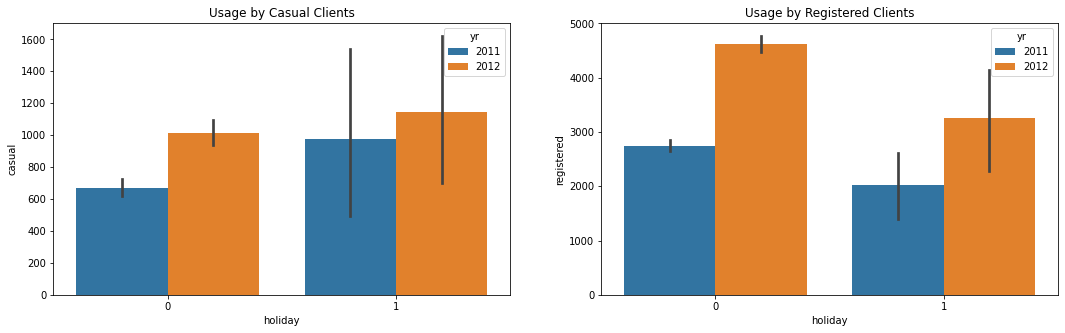

In [11]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.barplot('holiday', 'casual', hue ='yr', data=day_data_copy)
plt.title('Usage by Casual Clients')

plt.subplot(1, 2, 2)
sns.barplot('holiday', 'registered', hue='yr', data=day_data_copy)
plt.title('Usage by Registered Clients')

Casual clients using the bikes not in regular times: like on holiday or weekends, 
Registered users are using in regular bases. 

### Weather Usage

c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\judit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Usage by Registered Clients')

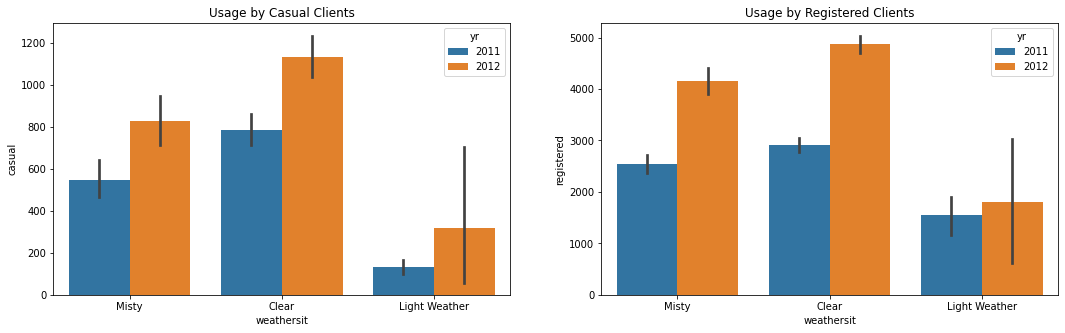

In [12]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.barplot('weathersit', 'casual', hue ='yr', data=day_data_copy)
plt.title('Usage by Casual Clients')

plt.subplot(1, 2, 2)
sns.barplot('weathersit', 'registered', hue='yr', data=day_data_copy)
plt.title('Usage by Registered Clients')

Clients dont use the bikes when the weather is extremely bad. 
and as expected the most user eses bikes when the wether is nice. 

### Weather Correlation

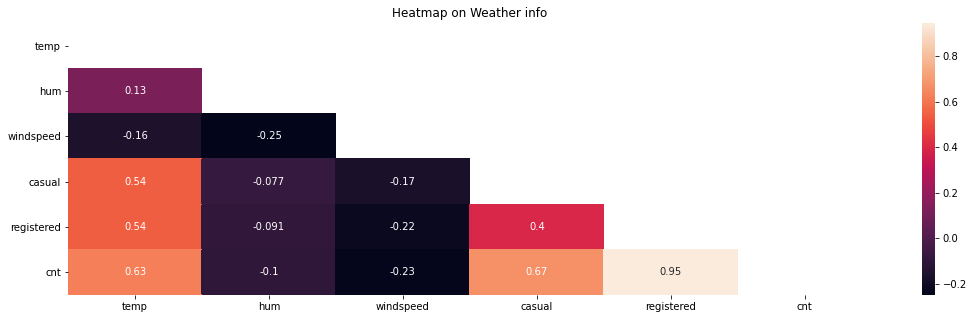

In [13]:
plt.figure(figsize = (18,5))

matrix = np.triu(day_data_copy[['temp','hum','windspeed','casual', 'registered', 'cnt']].corr())
sns.heatmap(day_data_copy[['temp','hum','windspeed','casual', 'registered', 'cnt']].corr(), annot = True, mask=matrix)
plt.title("Heatmap on Weather info")
plt.show()

The temp is the main correlation in usage. 

In [14]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Hourly Usage Average

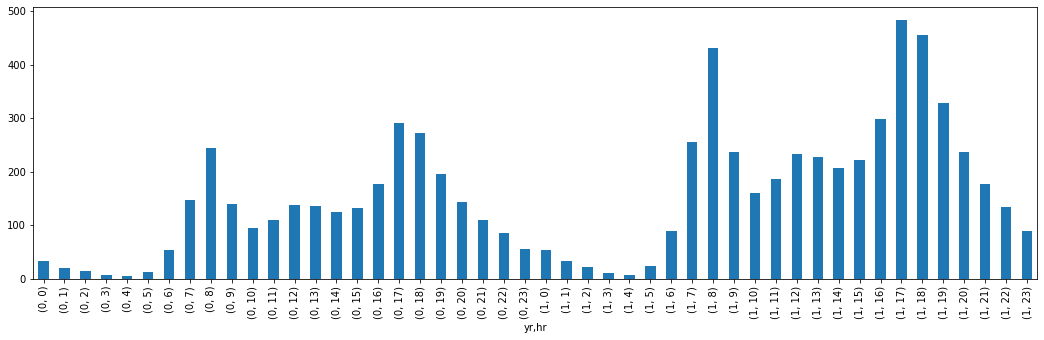

In [15]:
plt.figure(figsize=(18, 5))
registered_hour_data_avg = hour_data.groupby(['yr', 'hr'])['registered'].mean().plot(kind='bar')

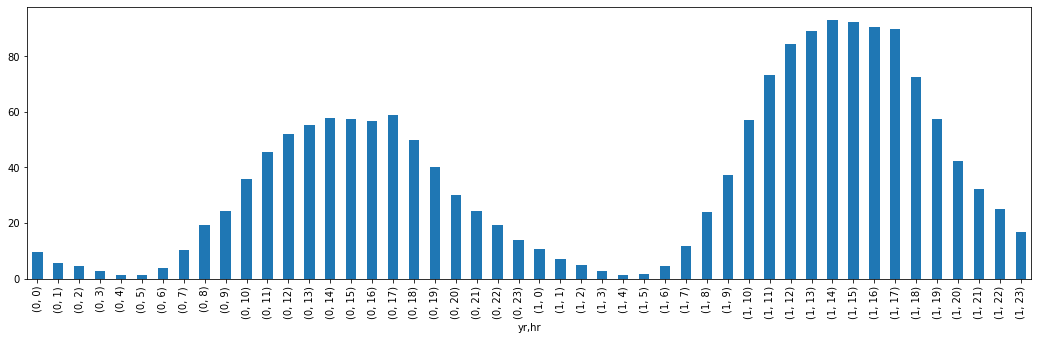

In [16]:
plt.figure(figsize=(18, 5))
casual_hour_data_avg = hour_data.groupby(['yr', 'hr'])['casual'].mean().plot(kind='bar')
#cnt_hour_data_avg = hour_data.groupby(['yr', 'hr'])['cnt'].mean()

For registered clients the the most usage is happening around 8 am and 17-18, when the user does to work/school.
For non registered users the most usage is happening between 10 and 19, for example sightseeing. 

# Modell

In [17]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
day_data_new = day_data.copy()
day_data_new.drop(['instant','dteday'], axis = 1, inplace = True)
day_data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
np.random.seed(0)
day_train, day_test = train_test_split(day_data_new, train_size = 0.7, random_state = 100)

In [20]:
day_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
576,3,1,7,0,1,1,1,0.730833,0.684987,0.668750,0.153617,1040,6065,7105
426,1,1,3,0,5,1,2,0.353333,0.359842,0.657083,0.144904,246,2948,3194
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
482,2,1,4,0,5,1,1,0.457500,0.452637,0.400833,0.347633,1014,5219,6233
111,2,0,4,0,5,1,2,0.336667,0.321954,0.729583,0.219521,177,1506,1683


# Reasearch Plan

## Goal

My goal within this project to predict registered and causal client number to the future, based on our 2011 and 2012 data. I already got fimiliar with the data. The data is pretty clean, I didnt had to handle missing data and invalid data at all. The temperature and other weather information already normaliized. After some visualization on different level, I discovered some trends and fun fact based on distributions, which will help to our study. 

## Data Preparation

The original data is clean, I didnt had to handle unusual or invalid data. For the model I have to create test and train dataset based on the original distribution. So for example for spring data the usage is pretty small, so when I create the test and train data sets, i have to make sure the ration between the seasons stays the same.

For test and train data generation I have to create a K-fold cross validation. This is a statistical method used to estimate the performance of a model by dividing the data into K subsets/folds. This technique helps in understanding how the model will generalize to an independent dataset. With this technique on test and training datasets, this method provides a more reliable estimate of model performance than a single train-test split.Considering we have limited data, as all the data points are used for both training and validation.

## Modell Plan

Fot the modell I would like to create a linear regression mdoel from SkiKit Learn (compatible with RFE), our original data is in the state to use it directly. After split the data to trian and test data set (most probably the ration should be 70-30 or 20-80 %), I am going to creat a linear regression modell. Based on the model I will make a preidiction for the future. I would like to measure the accuary on the modell, for performance evaluation I will use Mean Square Error and R-squared measure.s 